In [122]:
# define functions to create datasets

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def pull_top_hits(ligand, dataset, filters):
    if ligand == "D":
        ginf = "log_ginf_1-DIQ"
        ginf_var = "log_ginf_1-DIQ_err"
        ec50 = "log_ec50_1-DIQ"
        ec50_var = "log_ec50_1-DIQ_err"
        spec = "GP_spec_1-DIQ"
        spec_var = "GP_spec_1-DIQ_err"
    elif ligand == "S":
        ginf = "log_ginf_1S-TIQ"
        ginf_var = "log_ginf_1S-TIQ_err"
        ec50 = "log_ec50_1S-TIQ"
        ec50_var = "log_ec50_1S-TIQ_err"
        spec = "GP_spec_1S-TIQ"
        spec_var = "GP_spec_1S-TIQ_err"
    elif ligand == "R":
        ginf = "log_ginf_1R-TIQ"
        ginf_var = "log_ginf_1R-TIQ_err"
        ec50 = "log_ec50_1R-TIQ"
        ec50_var = "log_ec50_1R-TIQ_err"
        spec = "GP_spec_1R-TIQ"
        spec_var = "GP_spec_1R-TIQ_err"


    
    # define selectivity cutoffs
    # err_cut = 0.8
    # fold_ind = 1.7          #50
    # selectivity_cut = 1.5   #40
    # ec50_cut = 2.3          #200
    err_cut = filters["err_cut"]
    fold_ind = filters["fold_ind"]
    selectivity_cut = filters["selectivity_cut"]
    ec50_cut = filters["ec50_cut"]


    with open(dataset) as f:
        data = pd.read_csv(f)

    c = 0
    seqs = []
    for i, row in data.iterrows():
        if row["log_g0_err"] < err_cut and row[ginf_var] < err_cut and row[spec_var] < err_cut and row[ec50_var] < err_cut:
            if row[ginf] / row["log_g0"] > fold_ind:
                if row[ec50] < ec50_cut:
                    if row[spec] > selectivity_cut:
                        if dataset == "datasets/shuffleLib.csv":
                            seqs.append(row["ramR_amino_seq"])
                        else:
                            seqs.append(row["substitutions"])
                        c += 1
    print(str(c)+" sequences have been extracted")
    return seqs

def split_into_singles(data):
    singles = {}
    for i in all_subs:
        try:
            for k in i.split(":"):
                try:
                    if k in singles:
                        singles[k] += 1
                    else:
                        singles[k] = 1
                except:
                    pass
        except:
            try:
                if i in singles:
                    singles[i] += 1
                else:
                    singles[i] = 1
            except:
                pass
    return singles



In [113]:
# define plotting function
sns.set()
sns.set_style("white")
sns.set_style("ticks", {'xtick.direction':'in', 'xtick.top':False, 'ytick.direction':'in', 'ytick.right':False, })
plt.rcParams["xtick.labelsize"] = 22
plt.rcParams["ytick.labelsize"] = 18

def plot_mutrank(data, color, saveto, title):
    x = data.keys()
    y = data.values()
    fig = plt.figure(figsize=(6,8))
    ax = fig.add_subplot()
    plt.ticklabel_format(style="plain", axis="x")
    plt.xlabel("Frequency", fontsize=24, labelpad=15)
    plt.ylabel("Substitution", fontsize=24, labelpad=15)
    plt.title(title, fontsize=24, pad=15)
    # ax.set_xscale("log")
    plt.barh(x,y, height=0.6, color=color)
    plt.savefig(saveto, format="svg")
    plt.show()

In [104]:
# extract all single substitutions for D-specific variants
filters = {
    "err_cut" : 0.8,
    "fold_ind" : 1.7,          #50
    "selectivity_cut" : 1.5,   #40
    "ec50_cut" : 2.3          #200
}
EP_D = pull_top_hits("D", "datasets/epLib.csv", filters)
SS_D = pull_top_hits("D", "datasets/ssLibs.csv", filters)
all_subs = EP_D + SS_D


4 sequences have been extracted
7 sequences have been extracted


{'V139A': 1, 'S138E': 1, 'V139R': 1, 'H104R': 2, 'S138H': 2, 'V139I': 2, 'S138N': 2, 'V139L': 2, 'C135I': 3, 'C135R': 6}


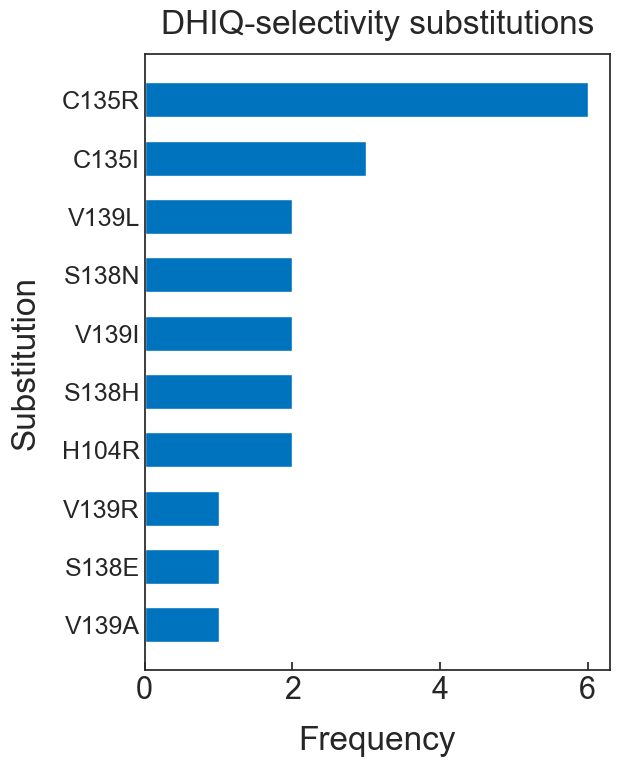

In [114]:
# get single subs
singles = split_into_singles(all_subs)
# sort by frequency
singles = dict(sorted(singles.items(), key=lambda item: item[1]))
# get the top 15
singles = dict(list(singles.items())[-10:])
print(singles)
plot_mutrank(singles, "#0073bf", "DHIQ_selectivity_subs.svg", "DHIQ-selectivity substitutions")

In [116]:
# extract all single substitutions for D-specific variants
filters = {
    "err_cut" : 0.6,
    "fold_ind" : 1.7,          #50
    "selectivity_cut" : 1.5,   #40
    "ec50_cut" : 2.3          #200
}
EP = pull_top_hits("R", "datasets/epLib.csv", filters)
SS = pull_top_hits("R", "datasets/ssLibs.csv", filters)
all_subs = EP + SS

13 sequences have been extracted
12 sequences have been extracted


{'K64C': 1, 'L67A': 1, 'V139M': 2, 'V139L': 2, 'S138C': 3, 'V139I': 3, 'S138F': 3, 'S138L': 3, 'K64I': 8, 'C135D': 10}


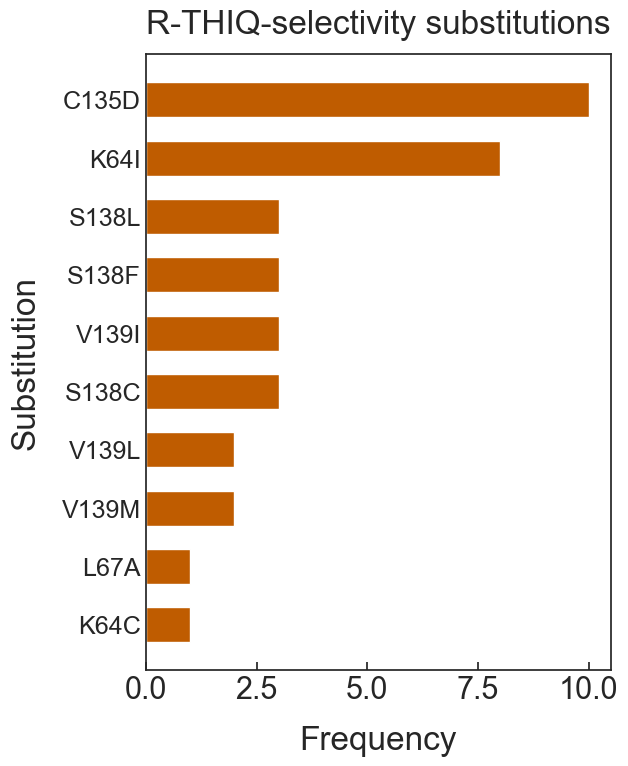

In [117]:
# get single subs
singles = split_into_singles(all_subs)
# sort by frequency
singles = dict(sorted(singles.items(), key=lambda item: item[1]))
# get the top 15
singles = dict(list(singles.items())[-10:])
print(singles)
plot_mutrank(singles, "#bf5c00", "R-THIQ_selectivity_subs.svg", "R-THIQ-selectivity substitutions")

In [126]:
# extract all single substitutions for D-specific variants
filters = {
    "err_cut" : 0.6,
    "fold_ind" : 1.7,          #50
    "selectivity_cut" : 1.7,   #50
    "ec50_cut" : 1.7           #50
}
EP = pull_top_hits("S", "datasets/epLib.csv", filters)
SS = pull_top_hits("S", "datasets/ssLibs.csv", filters)
all_subs = EP + SS

195 sequences have been extracted
254 sequences have been extracted


{'V139C': 20, 'S138Y': 24, 'C135T': 25, 'C135S': 26, 'C135G': 26, 'V139M': 30, 'C135A': 31, 'K64N': 39, 'S138H': 42, 'C135E': 69}


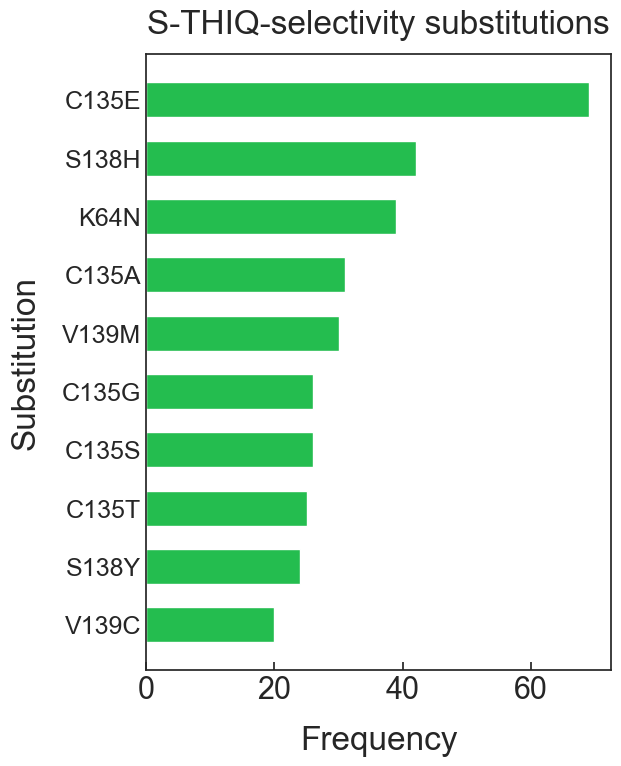

In [128]:
# get single subs
singles = split_into_singles(all_subs)
# sort by frequency
singles = dict(sorted(singles.items(), key=lambda item: item[1]))
# get the top 15
singles = dict(list(singles.items())[-10:])
print(singles)
plot_mutrank(singles, "#24bd4f", "S-THIQ_selectivity_subs.svg", "S-THIQ-selectivity substitutions")